In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Sheet for OCS analysis_Updated_Solutions.csv') ##Objective: To understand how Raw Material Cost and Demand and existing order load to impact the product pricing
dataset.head()

FileNotFoundError: ignored

# New Section

In [ ]:
dataset.isna().sum()

OCS Number                            0
OCS Date                              0
Month                                 0
Iron Ore Prices                       0
Premium HCC monthly                   0
Pig Iron FG (dr)                      0
Coke Domestic East                    0
Coke CFR India                        0
OCS Material Code                     0
Diameter                              0
Class                                 0
Ship-to-Region Code                   0
Booking CAM Code                      0
OCS Incoterms Code                    0
OCS Payment Terms Code                0
OCS Customer Group 1                  0
OCS Customer Group 2                  0
OCS Customer Group 4                433
OCS Order Quantity(Ton)               0
OCS Freight Rate(Currency/Meter)      0
OCS Open Quantity(Ton)                0
OCS NR (Currency/Ton)                 0
Dia Range                             0
Inquiry (Amount)                      0
WPI                                   0


In [ ]:
dataset.isna().any()

OCS Number                          False
OCS Date                            False
Month                               False
Iron Ore Prices                     False
Premium HCC monthly                 False
Pig Iron FG (dr)                    False
Coke Domestic East                  False
Coke CFR India                      False
OCS Material Code                   False
Diameter                            False
Class                               False
Ship-to-Region Code                 False
Booking CAM Code                    False
OCS Incoterms Code                  False
OCS Payment Terms Code              False
OCS Customer Group 1                False
OCS Customer Group 2                False
OCS Customer Group 4                 True
OCS Order Quantity(Ton)             False
OCS Freight Rate(Currency/Meter)    False
OCS Open Quantity(Ton)              False
OCS NR (Currency/Ton)               False
Dia Range                           False
Inquiry (Amount)                  

In [ ]:
dataset['OCS Customer Group 4'] = dataset['OCS Customer Group 4'].fillna(0)

In [ ]:
dataset.head()

,OCS Number,OCS Date,Month,Iron Ore Prices,Premium HCC monthly,Pig Iron FG (dr),Coke Domestic East,Coke CFR India,OCS Material Code,Diameter,...,OCS Customer Group 1,OCS Customer Group 2,OCS Customer Group 4,OCS Order Quantity(Ton),OCS Freight Rate(Currency/Meter),OCS Open Quantity(Ton),OCS NR (Currency/Ton),Dia Range,Inquiry (Amount),WPI
0,14000789,26-10-2020,Oct,5950,122,33700,23000,308.05,D300K9,300,...,B2B - Business to Contract,EAS - East Sales Office,0,330.011,170.28,1.371,"37,841.65",200-300,0.0,111.2
1,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D80K9,80,...,B2B - Business to Contract,WES - West Sales Office,0,7.945,0,0.001,"58,605.18",80-150,0.0,111.2
2,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D125K9,125,...,B2B - Business to Contract,WES - West Sales Office,0,9.728,0,9.728,"56,540.74",80-150,0.0,111.2
3,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D100K9,100,...,B2B - Business to Contract,WES - West Sales Office,0,0,0,0,"48,807.06",80-150,0.0,111.2
4,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D150K9,150,...,B2B - Business to Contract,WES - West Sales Office,0,0,0,0,"47,230.58",80-150,0.0,111.2


In [ ]:
dataset.isna().sum()

OCS Number                          0
OCS Date                            0
Month                               0
Iron Ore Prices                     0
Premium HCC monthly                 0
Pig Iron FG (dr)                    0
Coke Domestic East                  0
Coke CFR India                      0
OCS Material Code                   0
Diameter                            0
Class                               0
Ship-to-Region Code                 0
Booking CAM Code                    0
OCS Incoterms Code                  0
OCS Payment Terms Code              0
OCS Customer Group 1                0
OCS Customer Group 2                0
OCS Customer Group 4                0
OCS Order Quantity(Ton)             0
OCS Freight Rate(Currency/Meter)    0
OCS Open Quantity(Ton)              0
OCS NR (Currency/Ton)               0
Dia Range                           0
Inquiry (Amount)                    0
WPI                                 0
dtype: int64

In [ ]:
dataset[['OCS Order Quantity(Ton)','OCS Freight Rate(Currency/Meter)','OCS Open Quantity(Ton)','OCS NR (Currency/Ton)']] = dataset[['OCS Order Quantity(Ton)','OCS Freight Rate(Currency/Meter)','OCS Open Quantity(Ton)','OCS NR (Currency/Ton)']].astype(str)
dataset['OCS Order Quantity(Ton)'] = dataset['OCS Order Quantity(Ton)'].str.replace(',','')
dataset['OCS Freight Rate(Currency/Meter)'] = dataset['OCS Freight Rate(Currency/Meter)'].str.replace(',','')
dataset['OCS Open Quantity(Ton)'] = dataset['OCS Open Quantity(Ton)'].str.replace(',','')
dataset['OCS NR (Currency/Ton)'] = dataset['OCS NR (Currency/Ton)'].str.replace(',','')

In [ ]:
dataset.head()

,OCS Number,OCS Date,Month,Iron Ore Prices,Premium HCC monthly,Pig Iron FG (dr),Coke Domestic East,Coke CFR India,OCS Material Code,Diameter,...,OCS Customer Group 1,OCS Customer Group 2,OCS Customer Group 4,OCS Order Quantity(Ton),OCS Freight Rate(Currency/Meter),OCS Open Quantity(Ton),OCS NR (Currency/Ton),Dia Range,Inquiry (Amount),WPI
0,14000789,26-10-2020,Oct,5950,122,33700,23000,308.05,D300K9,300,...,B2B - Business to Contract,EAS - East Sales Office,0,330.011,170.28,1.371,37841.65,200-300,0.0,111.2
1,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D80K9,80,...,B2B - Business to Contract,WES - West Sales Office,0,7.945,0,0.001,58605.18,80-150,0.0,111.2
2,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D125K9,125,...,B2B - Business to Contract,WES - West Sales Office,0,9.728,0,9.728,56540.74,80-150,0.0,111.2
3,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D100K9,100,...,B2B - Business to Contract,WES - West Sales Office,0,0,0,0,48807.06,80-150,0.0,111.2
4,14000790,26-10-2020,Oct,5950,122,33700,23000,308.05,D150K9,150,...,B2B - Business to Contract,WES - West Sales Office,0,0,0,0,47230.58,80-150,0.0,111.2


In [ ]:
dataset[['OCS Order Quantity(Ton)','OCS Freight Rate(Currency/Meter)','OCS Open Quantity(Ton)','OCS NR (Currency/Ton)']] = dataset[['OCS Order Quantity(Ton)','OCS Freight Rate(Currency/Meter)','OCS Open Quantity(Ton)','OCS NR (Currency/Ton)']].astype(float)

In [ ]:
print(dataset['OCS Incoterms Code'].value_counts())

EXW    885
CPT    112
Name: OCS Incoterms Code, dtype: int64


In [ ]:
print(dataset['OCS Payment Terms Code'].value_counts())

AR01    282
ZA33    203
AR10    161
ZA31     73
ZA41     51
AR04     46
AR06     31
ZA46     29
ZA42     28
AR09     27
ZA43     15
AR13     15
ZA34     13
A005      8
ZR01      7
ZA32      5
ZA38      3
Name: OCS Payment Terms Code, dtype: int64


In [ ]:
print(dataset['OCS Customer Group 1'].value_counts())

B2E - Business to EPC         415
B2B - Business to Contract    395
B2G - Business to Govt.       105
B2D - Business to Dealer       74
EXP - Business to Overseas      8
Name: OCS Customer Group 1, dtype: int64


In [ ]:
print(dataset['OCS Customer Group 4'].value_counts())

KCT - Key customer    564
0                     433
Name: OCS Customer Group 4, dtype: int64


In [ ]:
print(dataset['Dia Range'].value_counts())

200-300    334
350-500    303
80-150     210
600-800    150
Name: Dia Range, dtype: int64


In [ ]:
print(dataset['Ship-to-Region Code'].value_counts())

27    168
21    159
23    146
9     141
20     81
19     81
8      42
37     41
6      28
10     20
4      19
22     14
24     12
29     10
32      9
36      8
7       6
33      6
2       3
5       1
3       1
18      1
Name: Ship-to-Region Code, dtype: int64


In [ ]:
print(dataset['Booking CAM Code'].value_counts())

7372        240
809         167
7370        148
7439         91
810          87
8072         83
7287         63
7130         33
7918         28
7377         25
7553         16
7375          8
7638          5
8019          1
20010113      1
7602          1
Name: Booking CAM Code, dtype: int64


In [ ]:
print(dataset.dtypes)

OCS Number                            int64
OCS Date                             object
Month                                object
Iron Ore Prices                       int64
Premium HCC monthly                   int64
Pig Iron FG (dr)                      int64
Coke Domestic East                    int64
Coke CFR India                      float64
OCS Material Code                    object
Diameter                              int64
Class                                object
Ship-to-Region Code                   int64
Booking CAM Code                      int64
OCS Incoterms Code                   object
OCS Payment Terms Code               object
OCS Customer Group 1                 object
OCS Customer Group 2                 object
OCS Customer Group 4                 object
OCS Order Quantity(Ton)             float64
OCS Freight Rate(Currency/Meter)    float64
OCS Open Quantity(Ton)              float64
OCS NR (Currency/Ton)               float64
Dia Range                       

In [ ]:
dataset['Coke CFR India'] = dataset['Coke CFR India'].apply(np.int64)

In [ ]:
print(dataset.dtypes)

OCS Number                            int64
OCS Date                             object
Month                                object
Iron Ore Prices                       int64
Premium HCC monthly                   int64
Pig Iron FG (dr)                      int64
Coke Domestic East                    int64
Coke CFR India                        int64
OCS Material Code                    object
Diameter                              int64
Class                                object
Ship-to-Region Code                   int64
Booking CAM Code                      int64
OCS Incoterms Code                   object
OCS Payment Terms Code               object
OCS Customer Group 1                 object
OCS Customer Group 2                 object
OCS Customer Group 4                 object
OCS Order Quantity(Ton)             float64
OCS Freight Rate(Currency/Meter)    float64
OCS Open Quantity(Ton)              float64
OCS NR (Currency/Ton)               float64
Dia Range                       

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,OCS Number,Iron Ore Prices,Premium HCC monthly,Pig Iron FG (dr),Coke Domestic East,Coke CFR India,Diameter,Ship-to-Region Code,Booking CAM Code,OCS Order Quantity(Ton),OCS Freight Rate(Currency/Meter),OCS Open Quantity(Ton),OCS NR (Currency/Ton),Inquiry (Amount),WPI
OCS Number,1.000000,0.731594,0.721139,0.923655,0.677979,0.684896,0.054867,0.072794,0.007294,0.049342,0.121149,0.168032,0.271679,-0.113634,0.963623
Iron Ore Prices,0.731594,1.000000,0.315473,0.705842,0.141593,0.213218,0.060334,-0.019519,-0.003283,0.057511,0.180562,0.104560,0.138886,-0.049058,0.804076
Premium HCC monthly,0.721139,0.315473,1.000000,0.712954,0.912901,0.920426,-0.025904,0.101769,-0.014919,0.012949,0.056093,0.148236,0.351525,-0.119162,0.702088
Pig Iron FG (dr),0.923655,0.705842,0.712954,1.000000,0.718850,0.700441,0.064977,0.005234,0.000054,0.065986,0.129938,0.198339,0.244034,-0.097921,0.971849
Coke Domestic East,0.677979,0.141593,0.912901,0.718850,1.000000,0.923953,0.014151,0.080431,0.000585,0.039324,0.043450,0.178791,0.265098,-0.111472,0.656168
Coke CFR India,0.684896,0.213218,0.920426,0.700441,0.923953,1.000000,0.006777,0.114835,-0.015643,0.016526,0.046115,0.143492,0.277904,-0.136594,0.674435
Diameter,0.054867,0.060334,-0.025904,0.064977,0.014151,0.006777,1.000000,0.054884,-0.016056,0.235638,0.717457,0.101241,-0.493001,0.035374,0.070076
Ship-to-Region Code,0.072794,-0.019519,0.101769,0.005234,0.080431,0.114835,0.054884,1.000000,0.029438,-0.085840,0.014682,-0.051389,0.039258,-0.040062,0.037696
Booking CAM Code,0.007294,-0.003283,-0.014919,0.000054,0.000585,-0.015643,-0.016056,0.029438,1.000000,-0.006712,-0.012334,-0.011584,0.016373,-0.008145,-0.003300
OCS Order Quantity(Ton),0.049342,0.057511,0.012949,0.065986,0.039324,0.016526,0.235638,-0.085840,-0.006712,1.000000,0.329271,0.764984,-0.222784,-0.015972,0.064995


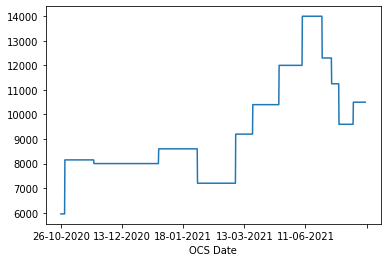

In [ ]:
dataset.set_index('OCS Date')['Iron Ore Prices'].plot()

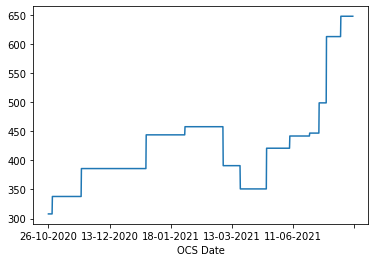

In [ ]:
dataset.set_index('OCS Date')['Coke CFR India'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2be3546310>]],
      dtype=object)

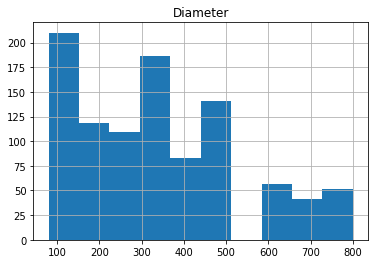

In [ ]:
dataset.hist(column='Diameter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2be35300d0>]],
      dtype=object)

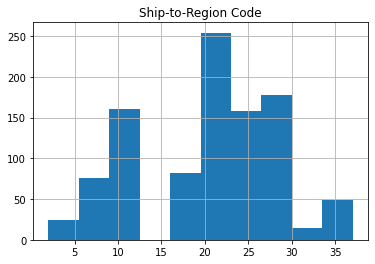

In [ ]:
dataset.hist(column='Ship-to-Region Code')

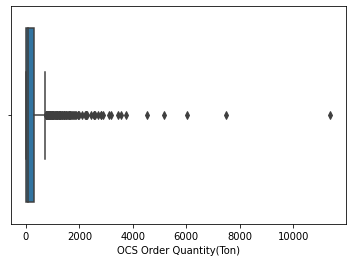

In [ ]:
import seaborn as sns
sns.boxplot(x=dataset['OCS Order Quantity(Ton)'])


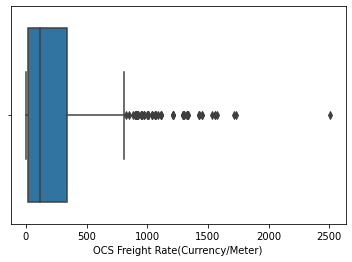

In [ ]:
sns.boxplot(x=dataset['OCS Freight Rate(Currency/Meter)'])

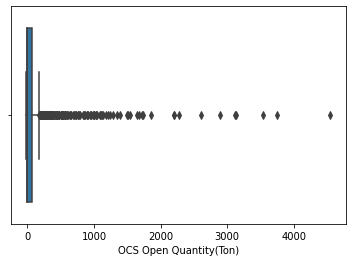

In [ ]:
sns.boxplot(x=dataset['OCS Open Quantity(Ton)'])

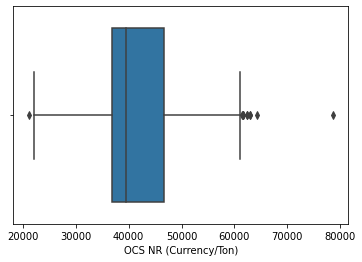

In [ ]:
sns.boxplot(x=dataset['OCS NR (Currency/Ton)'])

In [ ]:
print(dataset.dtypes)

OCS Number                            int64
OCS Date                             object
Month                                object
Iron Ore Prices                       int64
Premium HCC monthly                   int64
Pig Iron FG (dr)                      int64
Coke Domestic East                    int64
Coke CFR India                        int64
OCS Material Code                    object
Diameter                              int64
Class                                object
Ship-to-Region Code                   int64
Booking CAM Code                      int64
OCS Incoterms Code                   object
OCS Payment Terms Code               object
OCS Customer Group 1                 object
OCS Customer Group 2                 object
OCS Customer Group 4                 object
OCS Order Quantity(Ton)             float64
OCS Freight Rate(Currency/Meter)    float64
OCS Open Quantity(Ton)              float64
OCS NR (Currency/Ton)               float64
Dia Range                       

In [ ]:
dataset["OCS Customer Group 1"] = dataset["OCS Customer Group 1"].astype('category')
dataset["OCS Customer Group 2"] = dataset["OCS Customer Group 2"].astype('category')
dataset["OCS Customer Group 4"] = dataset["OCS Customer Group 4"].astype('category')
dataset["OCS Payment Terms Code"] = dataset["OCS Payment Terms Code"].astype('category')
dataset["OCS Incoterms Code"] = dataset["OCS Incoterms Code"].astype('category')
dataset["OCS Material Code"] = dataset["OCS Material Code"].astype('category')
dataset["Dia Range"] = dataset["Dia Range"].astype('category')
dataset["Class"] = dataset["Class"].astype('category')

In [ ]:
dataset["Ship-to-Region Code"] = dataset["Ship-to-Region Code"].astype('category')
dataset["Booking CAM Code"] = dataset["Booking CAM Code"].astype('category')

In [ ]:
print(dataset.dtypes)

OCS Number                             int64
OCS Date                              object
Month                                 object
Iron Ore Prices                        int64
Premium HCC monthly                    int64
Pig Iron FG (dr)                       int64
Coke Domestic East                     int64
Coke CFR India                         int64
OCS Material Code                   category
Diameter                               int64
Class                               category
Ship-to-Region Code                 category
Booking CAM Code                    category
OCS Incoterms Code                  category
OCS Payment Terms Code              category
OCS Customer Group 1                category
OCS Customer Group 2                category
OCS Customer Group 4                category
OCS Order Quantity(Ton)              float64
OCS Freight Rate(Currency/Meter)     float64
OCS Open Quantity(Ton)               float64
OCS NR (Currency/Ton)                float64
Dia Range 

In [ ]:
in dataset["OCS Customer Group 1 New"] = dataset["OCS Customer Group 1"].cat.codes
dataset["OCS Customer Group 2 New"] = dataset["OCS Customer Group 2"].cat.codes
dataset["OCS Customer Group 4 New"] = dataset["OCS Customer Group 4"].cat.codes
dataset["OCS Payment Terms Code New"] = dataset["OCS Payment Terms Code"].cat.codes
dataset["OCS Incoterms Code New"] = dataset["OCS Incoterms Code"].cat.codes
dataset["OCS Material Code New"] = dataset["OCS Material Code"].cat.codes
dataset["Dia Range"] = dataset["Dia Range"].cat.codes
dataset["Class"] = dataset["Class"].cat.codes
dataset.head()

,OCS Number,OCS Date,Month,Iron Ore Prices,Premium HCC monthly,Pig Iron FG (dr),Coke Domestic East,Coke CFR India,OCS Material Code,Diameter,...,OCS NR (Currency/Ton),Dia Range,Inquiry (Amount),WPI,OCS Customer Group 1 New,OCS Customer Group 2 New,OCS Customer Group 4 New,OCS Payment Terms Code New,OCS Incoterms Code New,OCS Material Code New
0,14000789,26-10-2020,Oct,5950,122,33700,23000,308,D300K9,300,...,37841.65,0,0.0,111.2,0,0,0,16,1,13
1,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D80K9,80,...,58605.18,3,0.0,111.2,0,3,0,1,1,64
2,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D125K9,125,...,56540.74,3,0.0,111.2,0,3,0,1,1,3
3,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D100K9,100,...,48807.06,3,0.0,111.2,0,3,0,1,1,1
4,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D150K9,150,...,47230.58,3,0.0,111.2,0,3,0,1,1,6


In [ ]:
dataset["Ship-to-Region Code New"] = dataset["Ship-to-Region Code"].cat.codes
dataset["Booking CAM Code New"] = dataset["Booking CAM Code"].cat.codes

In [ ]:
dataset_new = pd.get_dummies(dataset, columns=["OCS Incoterms Code", "OCS Payment Terms Code", "OCS Customer Group 1", "OCS Customer Group 2", "OCS Customer Group 4","Class","Dia Range"], prefix=["Inco","Pay","Grp1","Grp2","Grp4","ClassNew","RangeNew"]).head()

In [ ]:
dataset_new

,OCS Number,OCS Date,Month,Iron Ore Prices,Premium HCC monthly,Pig Iron FG (dr),Coke Domestic East,Coke CFR India,OCS Material Code,Diameter,...,Grp4_KCT - Key customer,ClassNew_0,ClassNew_1,ClassNew_2,ClassNew_3,ClassNew_4,RangeNew_0,RangeNew_1,RangeNew_2,RangeNew_3
0,14000789,26-10-2020,Oct,5950,122,33700,23000,308,D300K9,300,...,0,0,0,0,0,1,1,0,0,0
1,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D80K9,80,...,0,0,0,0,0,1,0,0,0,1
2,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D125K9,125,...,0,0,0,0,0,1,0,0,0,1
3,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D100K9,100,...,0,0,0,0,0,1,0,0,0,1
4,14000790,26-10-2020,Oct,5950,122,33700,23000,308,D150K9,150,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
remove = ['OCS Number','Month','OCS Date','Diameter','OCS Material Code','OCS Customer Group 1 New', 'OCS Customer Group 2 New','OCS Customer Group 4 New','OCS Payment Terms Code New','OCS Incoterms Code New','OCS Material Code New','Ship-to-Region Code New','Booking CAM Code New','Booking CAM Code','Ship-to-Region Code','WPI']
dataset_new2= dataset_new[dataset_new.columns.difference(remove)]

In [ ]:
dataset_new2.to_csv('dataset_new2.csv')

In [ ]:
dataset_new2.head()

,ClassNew_0,ClassNew_1,ClassNew_2,ClassNew_3,ClassNew_4,Coke CFR India,Coke Domestic East,Grp1_B2B - Business to Contract,Grp1_B2D - Business to Dealer,Grp1_B2E - Business to EPC,...,Pay_ZA42,Pay_ZA43,Pay_ZA46,Pay_ZR01,Pig Iron FG (dr),Premium HCC monthly,RangeNew_0,RangeNew_1,RangeNew_2,RangeNew_3
0,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,1,33700,122,1,0,0,0
1,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1
2,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1
3,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1
4,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1


In [ ]:
np.percentile(dataset['OCS Order Quantity(Ton)'],[25,50,60,70,75,80,90,95,99,100])

array([   15.877 ,    83.306 ,   142.1516,   227.2826,   302.032 ,
         400.5586,   767.8034,  1311.758 ,  2895.348 , 11388.89  ])

In [ ]:
np.percentile(dataset['OCS Freight Rate(Currency/Meter)'],[25,50,60,70,75,80,90,95,99,100])

array([  18.37 ,  116.36 ,  179.83 ,  272.73 ,  340.91 ,  419.614,
        671.268,  969.7  , 1428.57 , 2509.09 ])

In [ ]:
np.percentile(dataset['OCS Open Quantity(Ton)'],[25,50,60,70,75,80,90,95,99,100])

array([1.7000000e-02, 4.9800000e-01, 6.9820000e+00, 3.4542000e+01,
       7.1090000e+01, 1.3862800e+02, 3.9416840e+02, 7.4032100e+02,
       1.8703252e+03, 4.5488400e+03])

In [ ]:
np.percentile(dataset['OCS NR (Currency/Ton)'],[25,50,60,70,75,80,90,95,99,100])

array([36760.09 , 39448.07 , 42082.07 , 44444.254, 46610.52 , 48435.95 ,
       52486.596, 56039.95 , 60993.542, 78642.69 ])

In [ ]:
dataset_new2.head()

,ClassNew_0,ClassNew_1,ClassNew_2,ClassNew_3,ClassNew_4,Coke CFR India,Coke Domestic East,Grp1_B2B - Business to Contract,Grp1_B2D - Business to Dealer,Grp1_B2E - Business to EPC,...,Pay_ZA42,Pay_ZA43,Pay_ZA46,Pay_ZR01,Pig Iron FG (dr),Premium HCC monthly,RangeNew_0,RangeNew_1,RangeNew_2,RangeNew_3
0,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,1,33700,122,1,0,0,0
1,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1
2,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1
3,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1
4,0,0,0,0,1,308,23000,1,0,0,...,0,0,0,0,33700,122,0,0,0,1


In [ ]:
ni from sklearn.model_selection import train_test_split

X= dataset_new2.drop(['OCS NR (Currency/Ton)'], axis = 1)  # Features
y= dataset_new2['OCS NR (Currency/Ton)']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30% Test data and 70% is train

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)


In [ ]:
reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05803468, 0.        , 0.        ,
       0.09137801, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0876843 , 0.20608291, 0.24681365,
       0.        , 0.09137801, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05064726, 0.        , 0.        , 0.1136402 ,
       0.        , 0.        , 0.05434097])

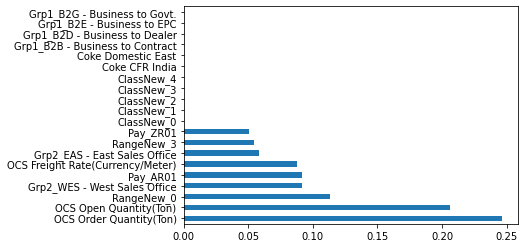

In [ ]:
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# test classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(reg, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: ignored

In [ ]:
err = abs(y_pred - y_test)
mape = 100 * (err / y_test)
print('Mean Absolute % Error:', round(np.mean(err), 2), 'degrees.')
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: ignored